In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
def decompor_tempo(dataset):
    dados = dataset.copy()
    dados['DATE_TIME'] = pd.to_datetime(dados['DATE_TIME'],dayfirst=True)
    dados['hora'] = dados['DATE_TIME'].dt.strftime("%H:%M")
    dados['dia'] = dados['DATE_TIME'].dt.date
    return dados

In [148]:
def importar():
    d1 = pd.read_csv("./Dados/Plant_1_Generation_Data.csv")
    d2 = pd.read_csv("./Dados/Plant_1_Weather_Sensor_Data.csv")
    d1 = decompor_tempo(d1)
    d2 = decompor_tempo(d2)
    p1 = pd.merge(d1,d2, on=['DATE_TIME','hora','PLANT_ID','dia'])
    p1 = p1.drop(axis=0, columns=['PLANT_ID','SOURCE_KEY_y'])
    
    
    d1 = pd.read_csv("./Dados/Plant_2_Generation_Data.csv")
    d2 = pd.read_csv("./Dados/Plant_2_Weather_Sensor_Data.csv")
    d1 = decompor_tempo(d1)
    d2 = decompor_tempo(d2)
    p2 = pd.merge(d1,d2, on=['DATE_TIME','hora','PLANT_ID','dia'])
    p2 = p2.drop(axis=0, columns=['PLANT_ID','SOURCE_KEY_y'])
    
    return  p1,p2

In [241]:
df1, df2 = importar()

C:\Users\alcid\AppData\Local\Temp\ipykernel_13496\880195635.py:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dados['DATE_TIME'] = pd.to_datetime(dados['DATE_TIME'],dayfirst=True)
C:\Users\alcid\AppData\Local\Temp\ipykernel_13496\880195635.py:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dados['DATE_TIME'] = pd.to_datetime(dados['DATE_TIME'],dayfirst=True)
C:\Users\alcid\AppData\Local\Temp\ipykernel_13496\880195635.py:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dados['DATE_TIME'] = pd.to_datetime(dados['DATE_TIME'],dayfirst=True)


In [242]:
df1

,DATE_TIME,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hora,dia,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,00:00,2020-05-15,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,00:00,2020-05-15,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,00:00,2020-05-15,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,00:00,2020-05-15,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,00:00,2020-05-15,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,23:45,2020-06-17,21.909288,20.427972,0.0
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,23:45,2020-06-17,21.909288,20.427972,0.0
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,23:45,2020-06-17,21.909288,20.427972,0.0
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,23:45,2020-06-17,21.909288,20.427972,0.0


In [228]:
df2.head()

,DATE_TIME,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hora,dia,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,00:00,2020-05-15,27.004764,25.060789,0.0
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,00:00,2020-05-15,27.004764,25.060789,0.0
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,00:00,2020-05-15,27.004764,25.060789,0.0
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,00:00,2020-05-15,27.004764,25.060789,0.0
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,00:00,2020-05-15,27.004764,25.060789,0.0


In [235]:
df1.nunique()

DATE_TIME               1319
SOURCE_KEY_x              22
DC_POWER               14643
AC_POWER               14598
DAILY_YIELD            13876
TOTAL_YIELD            15672
hora                      96
dia                        1
AMBIENT_TEMPERATURE     1319
MODULE_TEMPERATURE      1319
IRRADIATION              739
dtype: int64

In [50]:
df2.nunique()

DATE_TIME               3259
PLANT_ID                   1
SOURCE_KEY_x              22
DC_POWER               30825
AC_POWER               30783
DAILY_YIELD            30490
TOTAL_YIELD            33115
hora                      96
SOURCE_KEY_y               1
AMBIENT_TEMPERATURE     3259
MODULE_TEMPERATURE      3259
IRRADIATION             1863
dtype: int64

In [179]:
df1.head()

,DATE_TIME,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hora,dia,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,eficiencia
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,00:00,15/05,25.184316,22.857507,0.0,0.0
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,00:00,15/05,25.184316,22.857507,0.0,0.0
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,00:00,15/05,25.184316,22.857507,0.0,0.0
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,00:00,15/05,25.184316,22.857507,0.0,0.0
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,00:00,15/05,25.184316,22.857507,0.0,0.0


In [243]:
df1['eficiencia'] = ((df1['AC_POWER'] / df1['DC_POWER'])*100)
df1['eficiencia'].fillna(0,inplace=True)

In [244]:
df1

,DATE_TIME,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hora,dia,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,eficiencia
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,00:00,2020-05-15,25.184316,22.857507,0.0,0.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,00:00,2020-05-15,25.184316,22.857507,0.0,0.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,00:00,2020-05-15,25.184316,22.857507,0.0,0.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,00:00,2020-05-15,25.184316,22.857507,0.0,0.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,00:00,2020-05-15,25.184316,22.857507,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,23:45,2020-06-17,21.909288,20.427972,0.0,0.0
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,23:45,2020-06-17,21.909288,20.427972,0.0,0.0
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,23:45,2020-06-17,21.909288,20.427972,0.0,0.0
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,23:45,2020-06-17,21.909288,20.427972,0.0,0.0


0        2020-05-15
1        2020-05-15
2        2020-05-15
3        2020-05-15
4        2020-05-15
            ...    
28829           NaN
28830           NaN
28831           NaN
28832           NaN
28833           NaN
Name: dia, Length: 28834, dtype: object

In [245]:
df1.groupby('dia')['AMBIENT_TEMPERATURE'].median()

dia
2020-05-15    25.959082
2020-05-16    26.593669
2020-05-17    25.574118
2020-05-18    23.733905
2020-05-19    23.823187
2020-05-20    24.599841
2020-05-21    28.129877
2020-05-22    26.349790
2020-05-23    26.854494
2020-05-24    26.788442
2020-05-25    26.387640
2020-05-26    26.634405
2020-05-27    24.464885
2020-05-28    27.136144
2020-05-29    27.052079
2020-05-30    24.172807
2020-05-31    24.591292
2020-06-01    24.275914
2020-06-02    23.870036
2020-06-03    23.853275
2020-06-04    24.115727
2020-06-05    23.990735
2020-06-06    23.032048
2020-06-07    23.928252
2020-06-08    24.230407
2020-06-09    24.810828
2020-06-10    23.944030
2020-06-11    23.983864
2020-06-12    22.922358
2020-06-13    23.918456
2020-06-14    23.914901
2020-06-15    23.615840
2020-06-16    24.004372
2020-06-17    23.384139
Name: AMBIENT_TEMPERATURE, dtype: float64

In [180]:
import matplotlib.gridspec as gridspec

In [208]:
c = df1.groupby(['dia'],as_index=False)['AMBIENT_TEMPERATURE'].median()
c['dia'] = pd.to_datetime(c['dia'])

C:\Users\alcid\AppData\Local\Temp\ipykernel_13496\1949774262.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  c['dia'] = pd.to_datetime(c['dia'])


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 01/06, at position 0

In [256]:
df1

,DATE_TIME,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hora,dia,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,eficiencia
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,00:00,2020-05-15,25.184316,22.857507,0.0,0.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,00:00,2020-05-15,25.184316,22.857507,0.0,0.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,00:00,2020-05-15,25.184316,22.857507,0.0,0.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,00:00,2020-05-15,25.184316,22.857507,0.0,0.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,00:00,2020-05-15,25.184316,22.857507,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,23:45,2020-06-17,21.909288,20.427972,0.0,0.0
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,23:45,2020-06-17,21.909288,20.427972,0.0,0.0
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,23:45,2020-06-17,21.909288,20.427972,0.0,0.0
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,23:45,2020-06-17,21.909288,20.427972,0.0,0.0


<Axes: xlabel='dia', ylabel='DAILY_YIELD'>

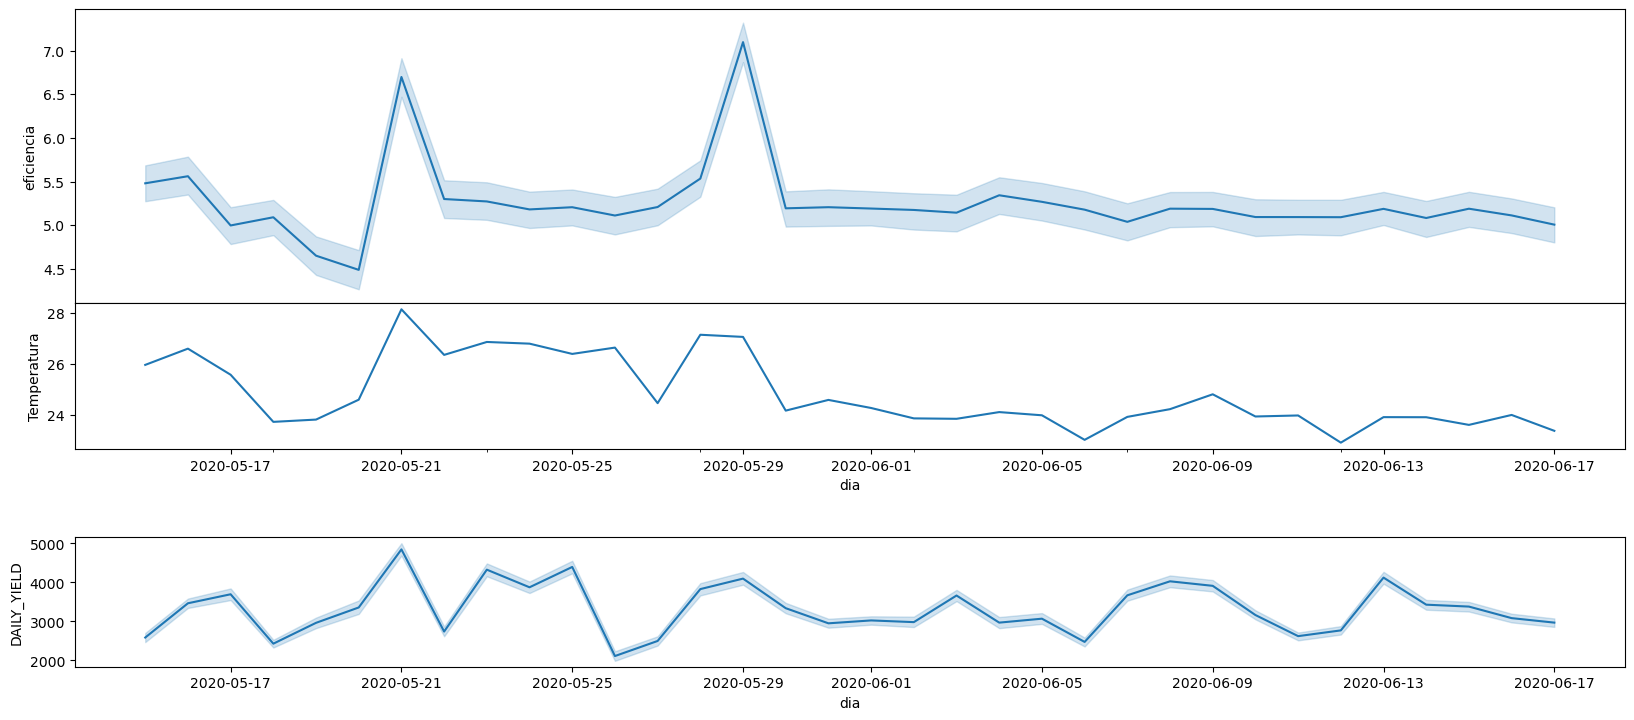

In [255]:
figura = plt.figure(figsize=(20,40))
# Definir a estrutura da grade externa
outer = gridspec.GridSpec(6, 1, wspace=0.3, hspace=0.2)

# Definir a estrutura da grade interna
inner = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=outer[0, 0],hspace=0)

# Gráfico 1 (primeiro subgráfico)
ax1 = plt.Subplot(figura, inner[0:2, 0])
figura.add_subplot(ax1)
sns.lineplot(data=df1, x='dia', y='eficiencia')

# Gráfico 1 (primeiro subgráfico)
ax1 = plt.Subplot(figura, inner[2, 0], sharex=ax1)
figura.add_subplot(ax1)
df1.groupby('dia')['AMBIENT_TEMPERATURE'].median().plot()
plt.ylabel('Temperatura')

# Definir a estrutura da grade interna
inner = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=outer[1, 0])

# Gráfico 1 (primeiro subgráfico)
ax1 = plt.Subplot(figura, inner[0, 0])
figura.add_subplot(ax1)
sns.lineplot(data=df1, x='dia',y='DAILY_YIELD')




In [257]:
df1

,DATE_TIME,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hora,dia,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,eficiencia
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,00:00,2020-05-15,25.184316,22.857507,0.0,0.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,00:00,2020-05-15,25.184316,22.857507,0.0,0.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,00:00,2020-05-15,25.184316,22.857507,0.0,0.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,00:00,2020-05-15,25.184316,22.857507,0.0,0.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,00:00,2020-05-15,25.184316,22.857507,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,23:45,2020-06-17,21.909288,20.427972,0.0,0.0
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,23:45,2020-06-17,21.909288,20.427972,0.0,0.0
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,23:45,2020-06-17,21.909288,20.427972,0.0,0.0
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,23:45,2020-06-17,21.909288,20.427972,0.0,0.0


<Axes: xlabel='hora', ylabel='eficiencia'>

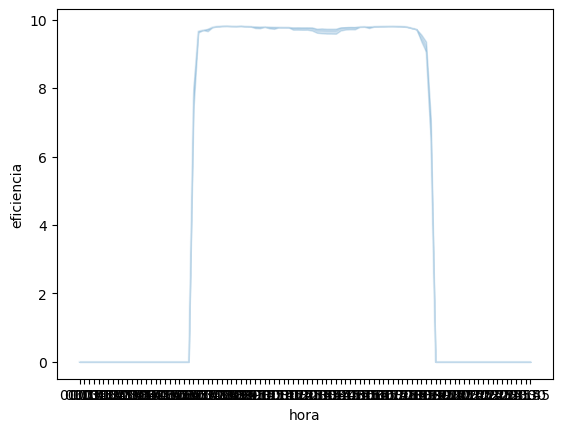

In [263]:
sns.lineplot(data=df1, x='hora',y='eficiencia', alpha=0.1)

<Axes: xlabel='dia', ylabel='eficiencia'>

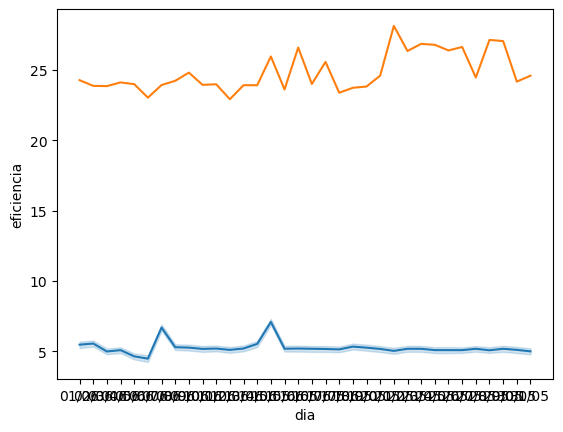

In [156]:

sns.lineplot(data=df1, x='dia', y='eficiencia')
df1.groupby('dia')['AMBIENT_TEMPERATURE'].median().plot()

<Axes: xlabel='dia', ylabel='TOTAL_YIELD'>

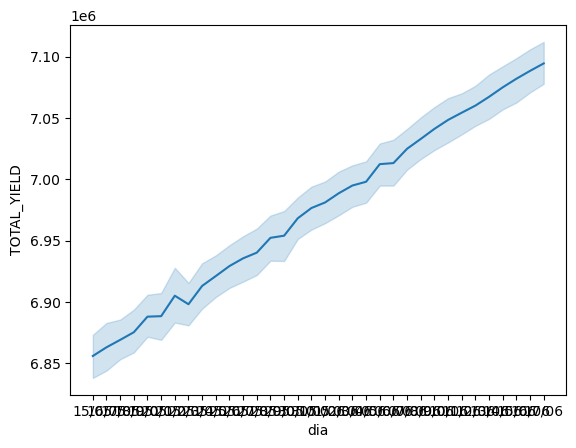

In [158]:
sns.lineplot(data=df1, x='dia',y='TOTAL_YIELD')

<Axes: xlabel='dia'>

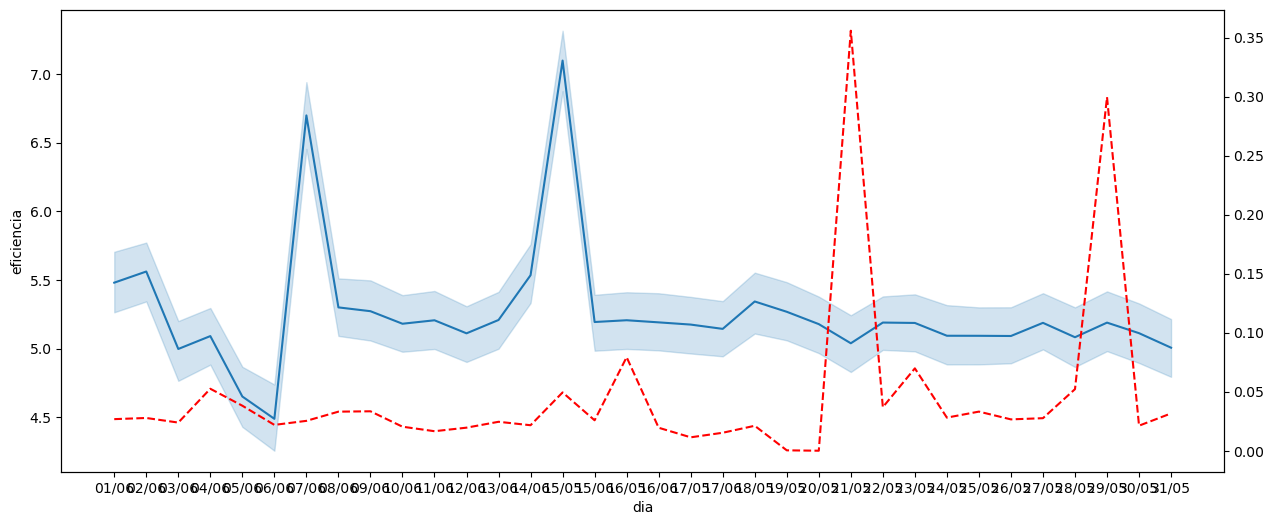

In [178]:


fig, ax1 = plt.subplots(figsize=(15, 6))
sns.lineplot(data=df1, x='dia',y='eficiencia')

ax2 = ax1.twinx()
df1.groupby('dia')['IRRADIATION'].median().plot(color='r',linestyle='--')
#ax1.invert_xaxis()

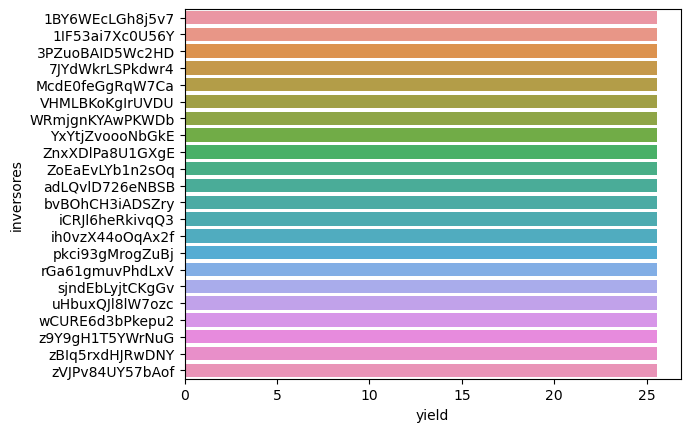

In [118]:
g2 = df1.groupby('SOURCE_KEY_x', as_index=False)[['AMBIENT_TEMPERATURE']].mean()
g2.columns=['inversores','yield']
fig = sns.barplot(data=g2, orient='h', x='yield', y='inversores')

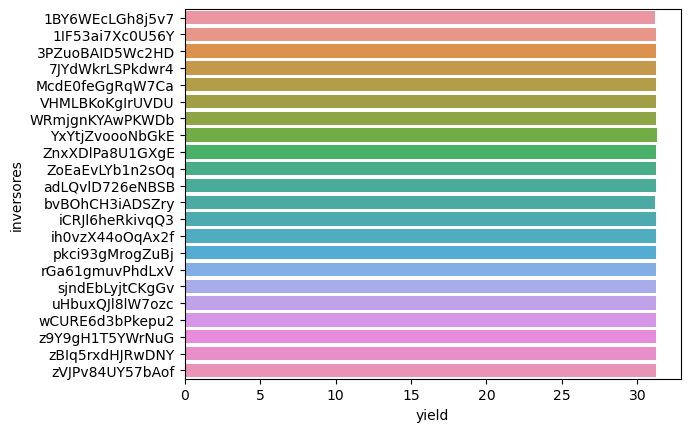

In [116]:
g2 = df1.groupby('SOURCE_KEY_x', as_index=False)[['MODULE_TEMPERATURE']].mean()
g2.columns=['inversores','yield']
fig = sns.barplot(data=g2, orient='h', x='yield', y='inversores')

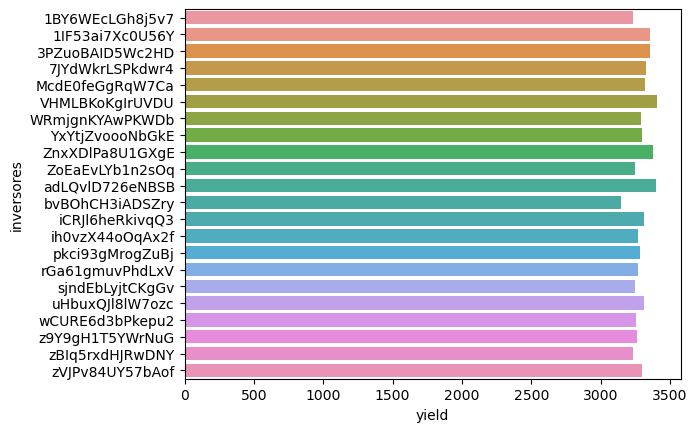

In [112]:
g2 = df1.groupby('SOURCE_KEY_x', as_index=False)[['DAILY_YIELD']].mean()
g2.columns=['inversores','yield']
fig = sns.barplot(data=g2, orient='h', x='yield', y='inversores')

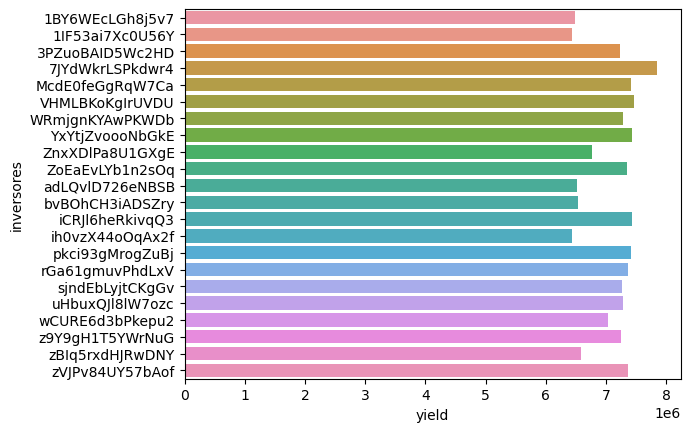

In [111]:
g2 = df1.groupby('SOURCE_KEY_x', as_index=False)[['TOTAL_YIELD']].max()
g2.columns=['inversores','yield']
fig = sns.barplot(data=g2, orient='h', x='yield', y='inversores')

In [105]:
p1_f = ((df1['AC_POWER'] / df1['DC_POWER']).mean())*100

9.77188468953472

In [106]:
p2_f = ((df2['AC_POWER'] / df2['DC_POWER']).mean())*100

97.68063442756191

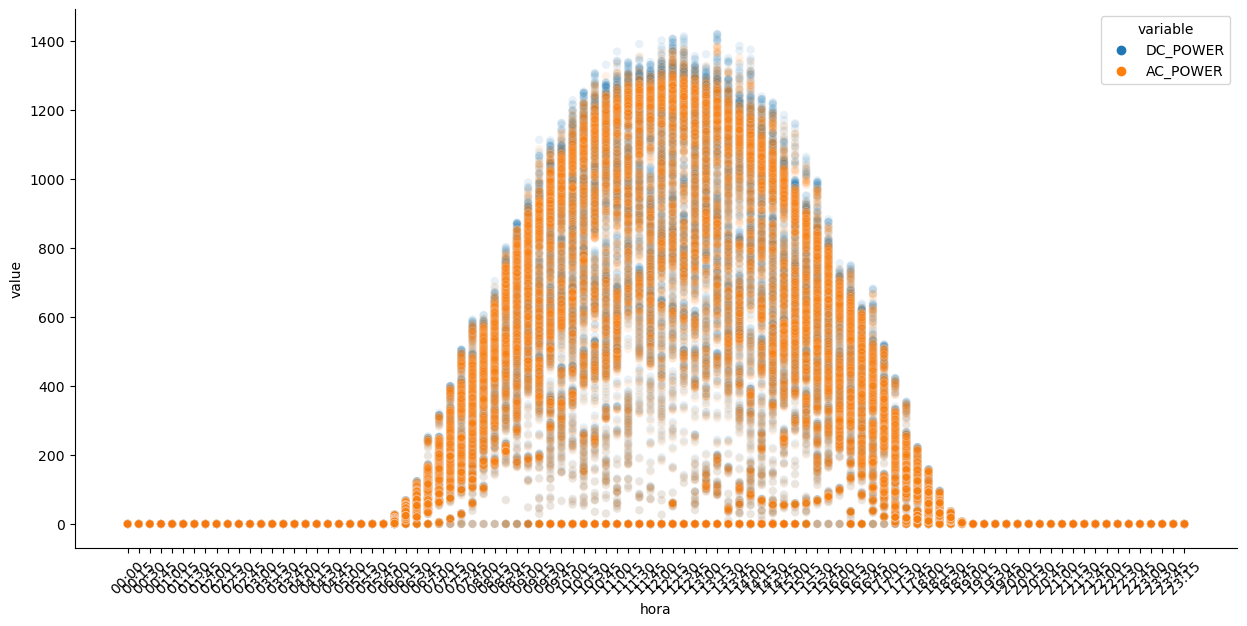

In [221]:
plt.figure(figsize=(15,7))
a = df2[['DC_POWER','AC_POWER','hora']].melt(id_vars='hora')
sns.scatterplot(data=a, x='hora',y='value', hue='variable',alpha=0.1);
sns.despine()
plt.xticks(rotation=45);

In [79]:
df1.groupby(['hora','SOURCE_KEY_x'])[['DC_POWER']].median()

DC_POWER
hora  SOURCE_KEY_x             
00:00 1BY6WEcLGh8j5v7       0.0
      1IF53ai7Xc0U56Y       0.0
      3PZuoBAID5Wc2HD       0.0
      7JYdWkrLSPkdwr4       0.0
      McdE0feGgRqW7Ca       0.0
...                         ...
23:45 uHbuxQJl8lW7ozc       0.0
      wCURE6d3bPkepu2       0.0
      z9Y9gH1T5YWrNuG       0.0
      zBIq5rxdHJRwDNY       0.0
      zVJPv84UY57bAof       0.0

[2112 rows x 1 columns]

<Axes: xlabel='hora', ylabel='TOTAL_YIELD'>

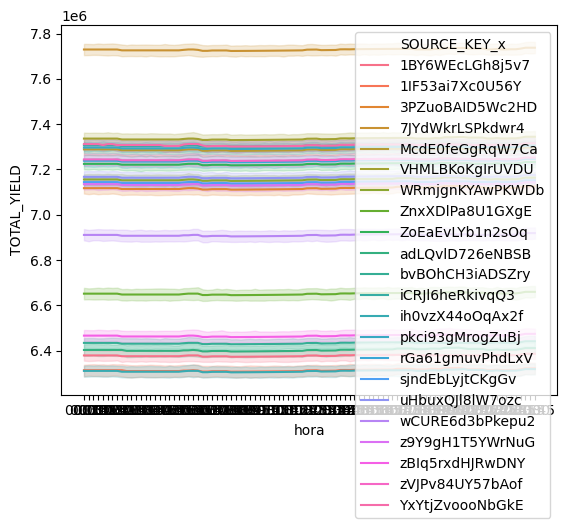

In [71]:
sns.lineplot(data=df1, x='hora',y='TOTAL_YIELD',hue='SOURCE_KEY_x')

In [54]:
df1.drop(axis=0, columns=['PLANT_ID','SOURCE_KEY_y'])

,DATE_TIME,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hora,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,00:00,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,00:00,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,00:00,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,00:00,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,00:00,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,23:45,21.909288,20.427972,0.0
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,23:45,21.909288,20.427972,0.0
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,23:45,21.909288,20.427972,0.0
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,23:45,21.909288,20.427972,0.0


O dataset apresentar inversores, cada inversor tem um código chamado de source_key. Ele vai transformar a energia Dc em Ac. 
1. Podemos identificar bons e maus inversores?
2. Podemos prever a geração de energia para os próximos dias?

# Exploração dos dados

### Entendendo os dados

In [124]:
df1.duplicated().sum()

0

In [126]:
df2.duplicated().sum()

0

In [125]:
df1.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [66]:
df2.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [127]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
PLANT_ID,68778.0,4.135001e+06,0.000000,4135001.0,4.135001e+06,4.135001e+06,4.135001e+06,4135001.000
DC_POWER,68778.0,3.147426e+03,4036.457169,0.0,0.000000e+00,4.290000e+02,6.366964e+03,14471.125
AC_POWER,68778.0,3.078028e+02,394.396439,0.0,0.000000e+00,4.149375e+01,6.236187e+02,1410.950
DAILY_YIELD,68778.0,3.295969e+03,3145.178309,0.0,0.000000e+00,2.658714e+03,6.274000e+03,9163.000
TOTAL_YIELD,68778.0,6.978712e+06,416271.982856,6183645.0,6.512003e+06,7.146685e+06,7.268706e+06,7846821.000


In [128]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
PLANT_ID,3182.0,4.135001e+06,0.000000,4.135001e+06,4.135001e+06,4.135001e+06,4.135001e+06,4.135001e+06
AMBIENT_TEMPERATURE,3182.0,2.553161e+01,3.354856,2.039850e+01,2.270518e+01,2.461381e+01,2.792053e+01,3.525249e+01
MODULE_TEMPERATURE,3182.0,3.109102e+01,12.261222,1.814042e+01,2.109055e+01,2.461806e+01,4.130784e+01,6.554571e+01
IRRADIATION,3182.0,2.283128e-01,0.300836,0.000000e+00,0.000000e+00,2.465348e-02,4.495884e-01,1.221652e+00


In [47]:
df1['PLANT_ID'].unique()

array([4135001], dtype=int64)

In [49]:
df2['PLANT_ID'].unique()

array([4135001], dtype=int64)

In [52]:
# Total de transformadores nos dados 1
df1['SOURCE_KEY'].nunique()

22

In [53]:
# Para o DF2, o source_key representa a identificação do Painel da planta e cada planta só tem uma.
# Podemos então remover os dados de plant_id, Source_key do df2
# Para o DF1 o plant_id da para remover
df2['SOURCE_KEY'].unique()

array(['HmiyD2TTLFNqkNe'], dtype=object)

In [41]:
# Analisando os dados de tempo, podemos decompor os date_time

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


### Tratamento dos dados

In [5]:
def tratamento(dataset, remover):
    dados = dataset.copy()
    dados = dados.drop(columns=remover)
    return dados

a1 = tratamento(df1,['PLANT_ID'])
a2 = tratamento(df2,['PLANT_ID','SOURCE_KEY'])

In [6]:
def decompor_tempo(dataset):
    dados = dataset.copy()
    dados['DATE_TIME'] = pd.to_datetime(dados['DATE_TIME'],dayfirst=True)
    dados['hora'] = dados['DATE_TIME'].dt.strftime("%H:%M")
    return dados


In [7]:
a1 = decompor_tempo(a1)
a1.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hora
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,00:00
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,00:00
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,00:00
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,00:00
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,00:00


In [8]:
a2 = decompor_tempo(a2)
a2.head()

C:\Users\alcid\AppData\Local\Temp\ipykernel_26996\2608605150.py:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dados['DATE_TIME'] = pd.to_datetime(dados['DATE_TIME'],dayfirst=True)


,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,hora
0,2020-05-15 00:00:00,25.184316,22.857507,0.0,00:00
1,2020-05-15 00:15:00,25.084589,22.761668,0.0,00:15
2,2020-05-15 00:30:00,24.935753,22.592306,0.0,00:30
3,2020-05-15 00:45:00,24.846130,22.360852,0.0,00:45
4,2020-05-15 01:00:00,24.621525,22.165423,0.0,01:00


### Visualização Gráfica

In [24]:
a1['hora'].unique()

array(['00:00', '00:15', '00:30', '00:45', '01:00', '01:15', '01:30',
       '01:45', '02:00', '02:15', '02:30', '02:45', '03:00', '03:15',
       '03:30', '03:45', '04:00', '04:15', '04:30', '04:45', '05:00',
       '05:15', '05:30', '05:45', '06:00', '06:15', '06:30', '06:45',
       '07:00', '07:15', '07:30', '07:45', '08:00', '08:15', '08:30',
       '08:45', '09:00', '09:15', '09:30', '09:45', '10:00', '10:15',
       '10:30', '10:45', '11:00', '11:15', '11:30', '11:45', '12:00',
       '12:15', '12:30', '12:45', '13:00', '13:15', '13:30', '13:45',
       '14:00', '14:15', '14:30', '14:45', '15:00', '15:15', '15:30',
       '15:45', '16:00', '16:15', '16:30', '16:45', '17:00', '17:15',
       '17:30', '17:45', '18:00', '18:15', '18:30', '18:45', '19:00',
       '19:15', '19:30', '19:45', '20:00', '20:15', '20:30', '20:45',
       '21:00', '21:15', '21:30', '21:45', '22:00', '22:15', '22:30',
       '22:45', '23:00', '23:15', '23:30', '23:45'], dtype=object)

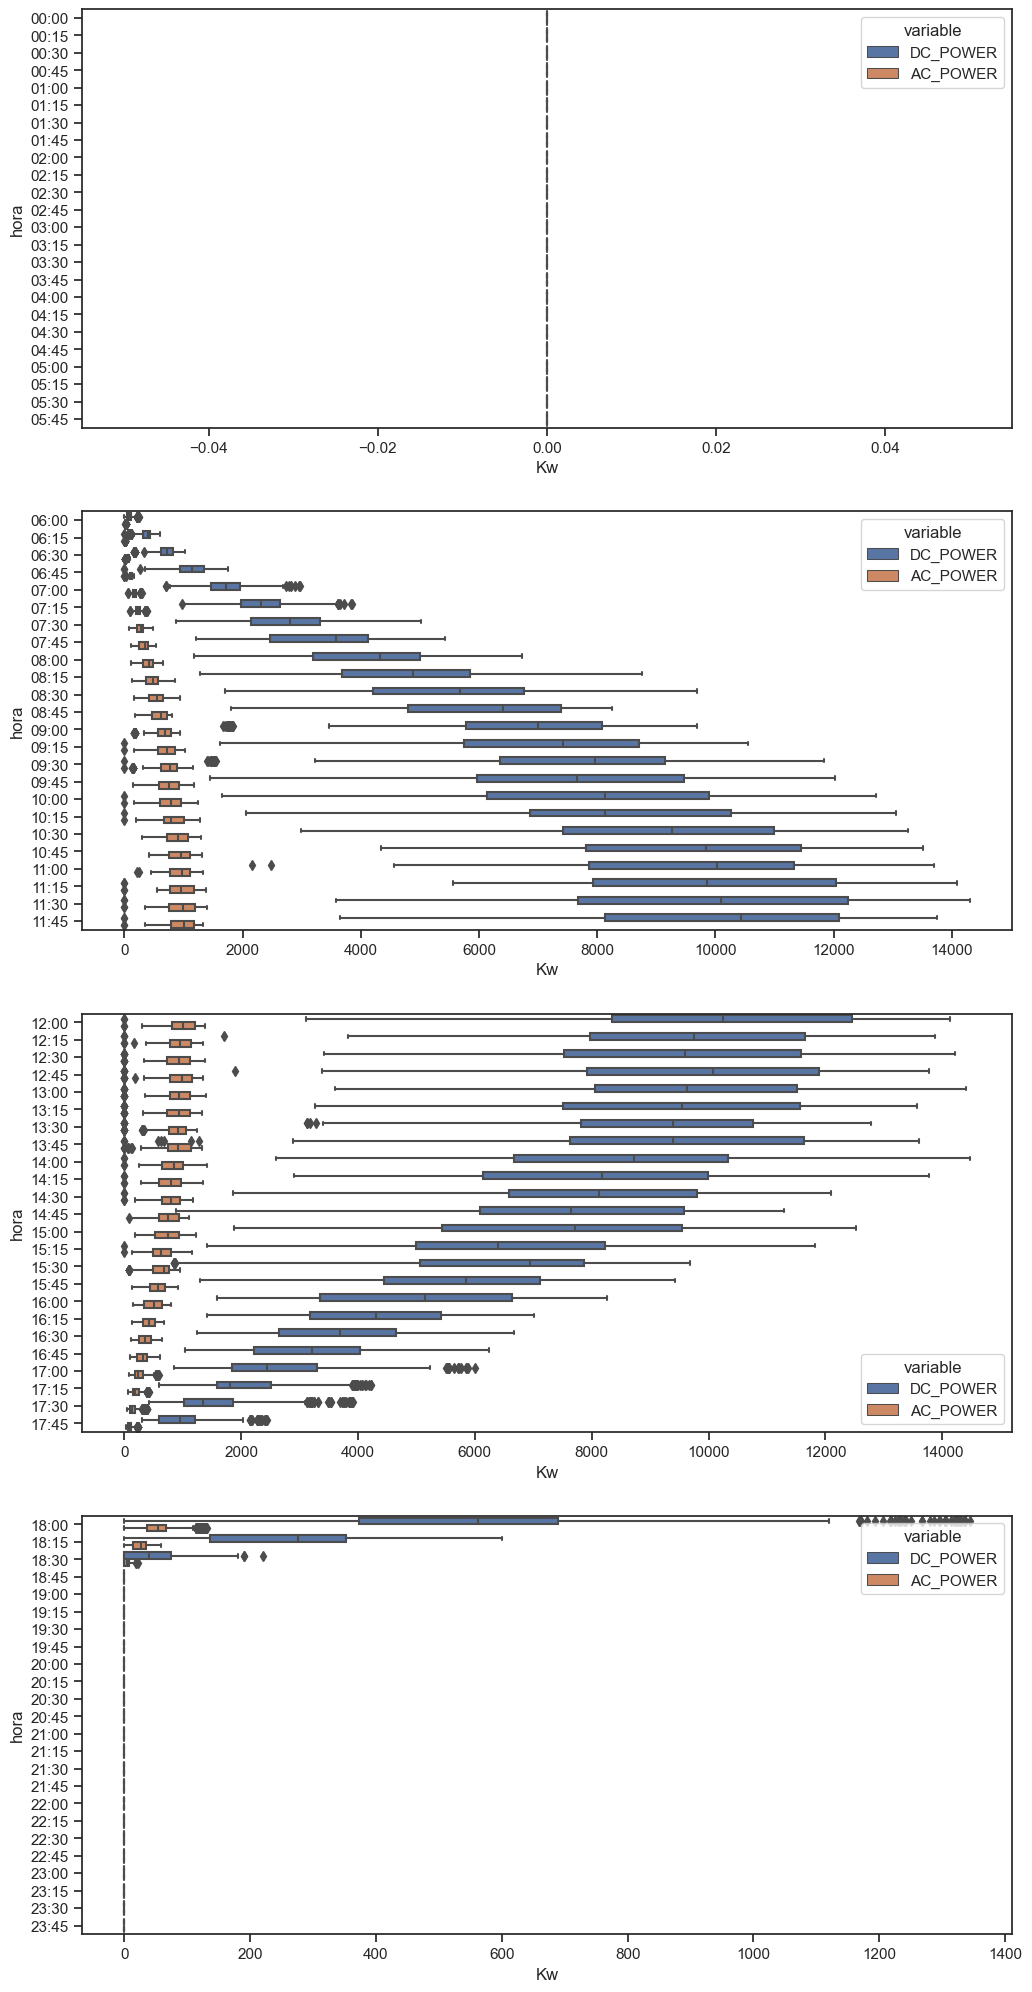

In [39]:
plt.figure(figsize=(12,25))
tamanho = (4,1)

classes = a1['classe'].unique().tolist()
count = 0
for row in range(4):
    for col in range(1):
        
        ax = plt.subplot2grid(
                tamanho,
                (row,col)
            )
        
        a = a1.copy()
        a = a.loc[a['classe'] == classes[count]]
        c = a[['DC_POWER','AC_POWER','hora']].melt(id_vars='hora')
        
        sns.boxplot(data=c, y='hora',x='value',hue='variable', orient='h')
        ax.set_xlabel("Kw")

        
        count +=1
        
        

In [31]:
a1

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hora,classe
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,00:00,0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,00:00,0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,00:00,0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,00:00,0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,00:00,0
...,...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,23:45,3
68774,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,23:45,3
68775,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,23:45,3
68776,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,23:45,3


In [30]:
def sep(x):
    if x < '06:00':
        return '0'
    elif (x >= '06:00') & (x < '12:00'):
        return '1'
    elif (x >= '12:00') & (x < '18:00'):
        return '2'
    elif (x >= '18:00') & (x < '24:00'):
        return '3'


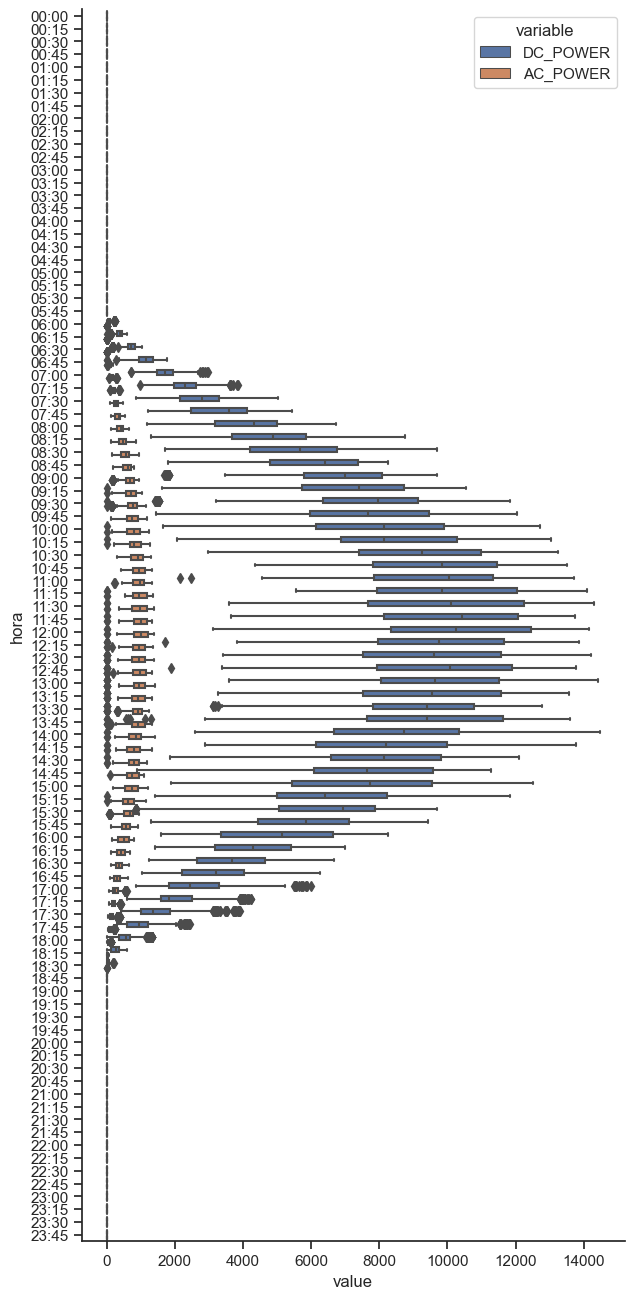

In [18]:

plt.figure(figsize=(7,16))
sns.boxplot(data=c1, y='hora',x='value',hue='variable', orient='h')
sns.despine()

<Axes: xlabel='hora', ylabel='value'>

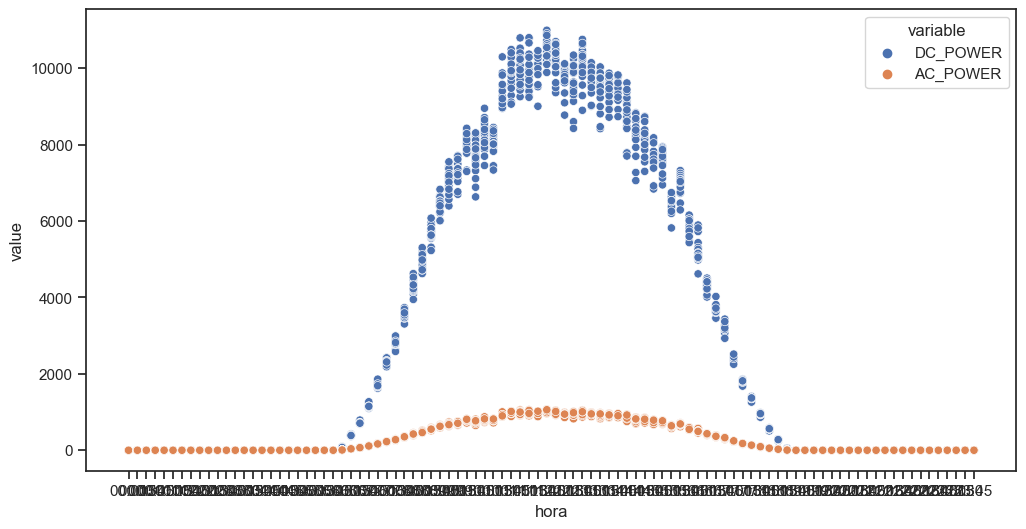

In [13]:

c1 = a1.groupby(['hora','SOURCE_KEY'], as_index=False)[['AC_POWER','DC_POWER']].median().drop(columns=['SOURCE_KEY'])
c1 = c1.melt(id_vars=['hora'], value_vars = ['DC_POWER','AC_POWER'])
plt.figure(figsize=(12,6))
sns.scatterplot(data=c1, x='hora',y='value',hue='variable')


In [172]:
a1

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hora
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,00:00
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,00:00
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,00:00
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,00:00
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,00:00
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,23:45
68774,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,23:45
68775,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,23:45
68776,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,23:45


In [41]:
pd.concat()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hora,classe
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,00:00,0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,00:00,0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,00:00,0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,00:00,0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,00:00,0
...,...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,23:45,3
68774,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,23:45,3
68775,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,23:45,3
68776,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,23:45,3


<Axes: xlabel='hora', ylabel='DC_POWER'>

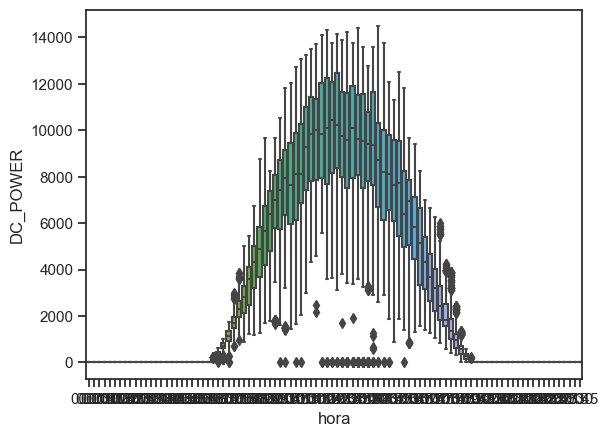

In [173]:
sns.boxplot(data=a1, x='hora',y='DC_POWER')

In [43]:
pd.merge(a1,a2, on=['DATE_TIME','hora'])

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hora,classe,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,00:00,0,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,00:00,0,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,00:00,0,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,00:00,0,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,00:00,0,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,23:45,3,21.909288,20.427972,0.0
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,23:45,3,21.909288,20.427972,0.0
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,23:45,3,21.909288,20.427972,0.0
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,23:45,3,21.909288,20.427972,0.0


In [3]:
def importar():
    dados = pd.read_csv("./Dados/spg.csv")
    return dados

In [4]:
teste = importar()

In [5]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [6]:
teste.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [7]:
teste.nunique()

temperature_2_m_above_gnd            2413
relative_humidity_2_m_above_gnd        94
mean_sea_level_pressure_MSL           376
total_precipitation_sfc                23
snowfall_amount_sfc                    11
total_cloud_cover_sfc                 160
high_cloud_cover_high_cld_lay          97
medium_cloud_cover_mid_cld_lay         98
low_cloud_cover_low_cld_lay            99
shortwave_radiation_backwards_sfc    1015
wind_speed_10_m_above_gnd            1505
wind_direction_10_m_above_gnd        2497
wind_speed_80_m_above_gnd            1761
wind_direction_80_m_above_gnd        2712
wind_speed_900_mb                    1528
wind_direction_900_mb                2510
wind_gust_10_m_above_gnd              189
angle_of_incidence                   4211
zenith                               4211
azimuth                              4210
generated_power_kw                   4213
dtype: int64

df = pd.read_csv("./Dados/ds_solar_3.csv")

In [3]:
df = pd.read_csv("./Dados/ds_solar_3.csv")

In [4]:
df

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,243,2009,8,31,10,True,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,243,2009,8,31,13,True,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,243,2009,8,31,16,True,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,243,2009,8,31,19,True,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Day of Year                           2920 non-null   int64  
 1   Year                                  2920 non-null   int64  
 2   Month                                 2920 non-null   int64  
 3   Day                                   2920 non-null   int64  
 4   First Hour of Period                  2920 non-null   int64  
 5   Is Daylight                           2920 non-null   bool   
 6   Distance to Solar Noon                2920 non-null   float64
 7   Average Temperature (Day)             2920 non-null   int64  
 8   Average Wind Direction (Day)          2920 non-null   int64  
 9   Average Wind Speed (Day)              2920 non-null   float64
 10  Sky Cover                             2920 non-null   int64  
 11  Visibility       

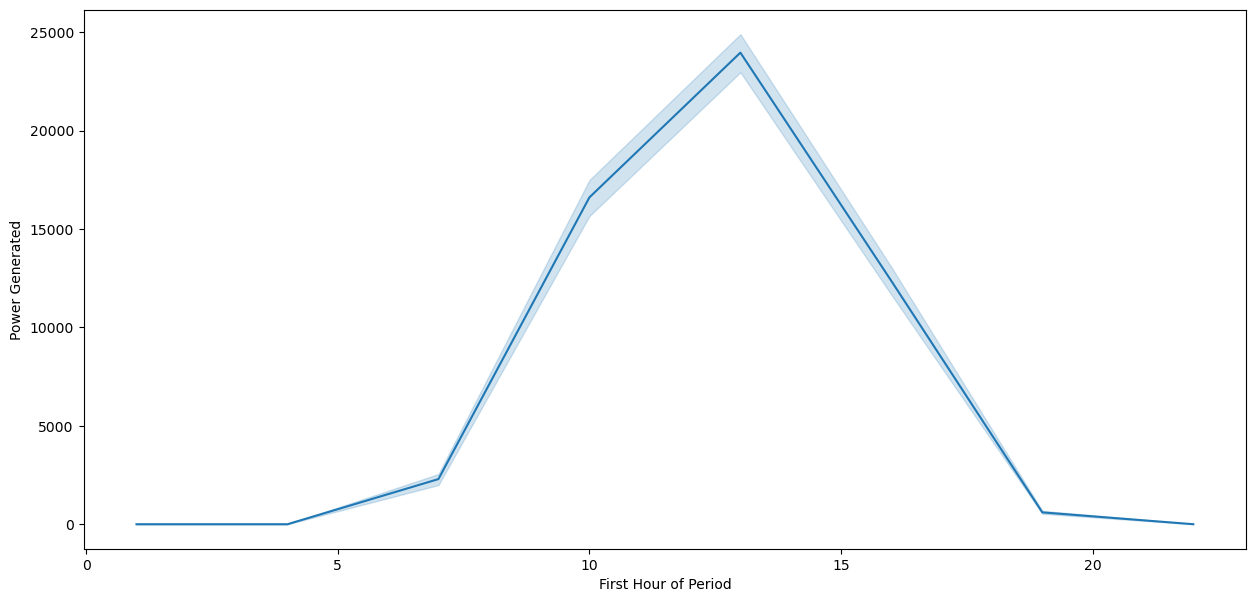

In [6]:
figura = plt.figure(figsize=(15,7))
fig = sns.lineplot(data=df, x='First Hour of Period', y='Power Generated')

In [ ]:
figura = plt.figure(figsize=(15,7))
fig = sns.boxplot(data=df, x='First Hour of Period', y='Power Generated', orient='h')